In [215]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [216]:
races_data = pd.read_csv('./data_files/races.csv')
pit_stop_data = pd.read_csv('./data_files/pit_stops.csv')
drivers = pd.read_csv('./data_files/drivers.csv')

# Defying the two Abu Dhabi races from 2020 and 2021

In [217]:
races_data = races_data[races_data['circuitId'] == 24][-3:-1]
races_data.drop(columns=['url', 'time', 'date'],inplace=True)
races_data

,raceId,year,round,circuitId,name
1034,1047,2020,17,24,Abu Dhabi Grand Prix
1057,1073,2021,22,24,Abu Dhabi Grand Prix


### Gather the pitstops from the abu dhabi Grand prix for 2020 and 2021

In [218]:
pit_stop_2020 = pit_stop_data[pit_stop_data['raceId']==1047]
pit_stop_2020
pit_stop_2021 = pit_stop_data[pit_stop_data['raceId'] == 1073]
pit_stop_2021

,raceId,driverId,stop,lap,time,duration,milliseconds
8799,1073,854,1,10,17:18:55,22.124,22124
8800,1073,830,1,13,17:22:42,21.152,21152
8801,1073,1,1,14,17:24:04,21.595,21595
8802,1073,844,1,15,17:26:08,22.461,22461
8803,1073,839,1,15,17:26:13,21.677,21677
8804,1073,846,1,17,17:29:04,21.380,21380
8805,1073,841,1,17,17:29:20,22.283,22283
8806,1073,817,1,18,17:30:47,21.449,21449
8807,1073,832,1,19,17:31:59,22.213,22213
8808,1073,815,1,21,17:34:55,21.471,21471


### Gather drivers that attended both races in 2020 and 2021

In [219]:
#sorts the 2021 drivers that attended the 2020 race aswell
pit_stop_2021= pit_stop_2021[pit_stop_2021['driverId'].isin(pit_stop_2020['driverId'])]
pit_stop_2021
#sorts the 2020 drivers that atteded the 2021 race aswell
pit_stop_2020= pit_stop_2020[pit_stop_2020['driverId'].isin(pit_stop_2021['driverId'])]
pit_stop_2020

,raceId,driverId,stop,lap,time,duration,milliseconds
8007,1047,830,1,10,17:30:57,21.289,21289
8008,1047,822,1,10,17:31:02,21.587,21587
8009,1047,1,1,10,17:31:09,22.406,22406
8011,1047,846,1,10,17:31:22,21.840,21840
8012,1047,832,1,10,17:31:29,22.140,22140
8013,1047,840,1,10,17:31:30,22.036,22036
8014,1047,842,1,10,17:31:33,22.000,22000
8016,1047,839,1,10,17:31:40,21.615,21615
8017,1047,8,1,10,17:31:49,22.012,22012
8020,1047,849,1,11,17:34:29,21.357,21357


### These are only drivers that had a pit stop completed in both abu dhabi races for the 2020 and 2021 seasons

In [220]:
drivers = drivers[drivers['driverId'].isin(pit_stop_2020['driverId'])]
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
19,20,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
452,842,gasly,10,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly
816,817,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
821,822,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas
829,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen
831,832,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.
838,839,ocon,31,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon
839,840,stroll,18,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll


In [221]:
drivers.drop(columns=['url','dob','nationality','forename','driverRef'], inplace=True)
drivers

,driverId,number,code,surname
0,1,44,HAM,Hamilton
7,8,7,RAI,Räikkönen
19,20,5,VET,Vettel
452,842,10,GAS,Gasly
816,817,3,RIC,Ricciardo
821,822,77,BOT,Bottas
829,830,33,VER,Verstappen
831,832,55,SAI,Sainz
838,839,31,OCO,Ocon
839,840,18,STR,Stroll


### Making new column with the pit stops to have the driver surname code

In [222]:
drivers = drivers.set_index('driverId')
drivers_dict = drivers.to_dict('dict')
drivers_dict['surname']

{1: 'Hamilton',
 8: 'Räikkönen',
 20: 'Vettel',
 842: 'Gasly',
 817: 'Ricciardo',
 822: 'Bottas',
 830: 'Verstappen',
 832: 'Sainz',
 839: 'Ocon',
 840: 'Stroll',
 841: 'Giovinazzi',
 844: 'Leclerc',
 846: 'Norris',
 849: 'Latifi'}

In [223]:

driver_names = pit_stop_data['driverId'].replace(drivers_dict['surname'])
driver_names

0          153
1           30
2           17
3            4
4           13
         ...  
8823    Stroll
8824       815
8825       854
8826       852
8827     Gasly
Name: driverId, Length: 8828, dtype: object

In [224]:
pit_stop_2020['surname'] = driver_names
pit_stop_2020 = pit_stop_2020.sort_values(by='driverId').reset_index()
pit_stop_2020

,index,raceId,driverId,stop,lap,time,duration,milliseconds,surname
0,8009,1047,1,1,10,17:31:09,22.406,22406,Hamilton
1,8017,1047,8,1,10,17:31:49,22.012,22012,Räikkönen
2,8025,1047,20,1,35,18:17:15,22.040,22040,Vettel
3,8027,1047,817,1,39,18:23:37,22.123,22123,Ricciardo
4,8008,1047,822,1,10,17:31:02,21.587,21587,Bottas
5,8007,1047,830,1,10,17:30:57,21.289,21289,Verstappen
6,8012,1047,832,1,10,17:31:29,22.140,22140,Sainz
7,8016,1047,839,1,10,17:31:40,21.615,21615,Ocon
8,8013,1047,840,1,10,17:31:30,22.036,22036,Stroll
9,8022,1047,841,1,27,18:03:41,21.480,21480,Giovinazzi


since latifi is the only one with a 2nd pitstop this will only keep his fastest time

In [225]:
pit_stop_2020 = pit_stop_2020[:-1]
pit_stop_2020

,index,raceId,driverId,stop,lap,time,duration,milliseconds,surname
0,8009,1047,1,1,10,17:31:09,22.406,22406,Hamilton
1,8017,1047,8,1,10,17:31:49,22.012,22012,Räikkönen
2,8025,1047,20,1,35,18:17:15,22.040,22040,Vettel
3,8027,1047,817,1,39,18:23:37,22.123,22123,Ricciardo
4,8008,1047,822,1,10,17:31:02,21.587,21587,Bottas
5,8007,1047,830,1,10,17:30:57,21.289,21289,Verstappen
6,8012,1047,832,1,10,17:31:29,22.140,22140,Sainz
7,8016,1047,839,1,10,17:31:40,21.615,21615,Ocon
8,8013,1047,840,1,10,17:31:30,22.036,22036,Stroll
9,8022,1047,841,1,27,18:03:41,21.480,21480,Giovinazzi


In [226]:
pit_stop_2021['surname'] = driver_names
pit_stop_2021 = pit_stop_2021.sort_values(by='driverId').reset_index()
pit_stop_2021

,index,raceId,driverId,stop,lap,time,duration,milliseconds,surname
0,8801,1073,1,1,14,17:24:04,21.595,21595,Hamilton
1,8810,1073,8,1,21,17:35:29,22.338,22338,Räikkönen
2,8812,1073,20,1,23,17:38:23,21.221,21221,Vettel
3,8822,1073,817,2,52,18:22:38,22.056,22056,Ricciardo
4,8806,1073,817,1,18,17:30:47,21.449,21449,Ricciardo
5,8814,1073,822,1,30,17:48:30,21.669,21669,Bottas
6,8821,1073,830,3,53,18:22:37,21.453,21453,Verstappen
7,8816,1073,830,2,36,17:57:06,21.871,21871,Verstappen
8,8800,1073,830,1,13,17:22:42,21.152,21152,Verstappen
9,8807,1073,832,1,19,17:31:59,22.213,22213,Sainz


Gets the fastest pit time for each driver 

In [227]:
pit_stop_2021 = pit_stop_2021.groupby('surname').min().reset_index()

Combining the two DF into one 

In [228]:
pit_times = pit_stop_2021.append(pit_stop_2020, ignore_index=True)
pit_times.rename(columns={'raceId': 'year'}, inplace=True)
pit_times['year'].replace({1073: 2021, 1047 : 2020}, inplace=True)
pit_times

,surname,index,year,driverId,stop,lap,time,duration,milliseconds
0,Bottas,8814,2021,822,1,30,17:48:30,21.669,21669
1,Gasly,8819,2021,842,1,36,17:58:06,21.920,21920
2,Giovinazzi,8805,2021,841,1,17,17:29:20,22.283,22283
3,Hamilton,8801,2021,1,1,14,17:24:04,21.595,21595
4,Latifi,8813,2021,849,1,28,17:46:18,21.241,21241
5,Leclerc,8802,2021,844,1,15,17:26:08,21.173,21173
6,Norris,8804,2021,846,1,17,17:29:04,21.380,21380
7,Ocon,8803,2021,839,1,15,17:26:13,21.677,21677
8,Ricciardo,8806,2021,817,1,18,17:30:47,21.449,21449
9,Räikkönen,8810,2021,8,1,21,17:35:29,22.338,22338


fix for milliseconds for later annotation error

In [229]:
pit_times['milliseconds']= pit_times['milliseconds'] / 1000

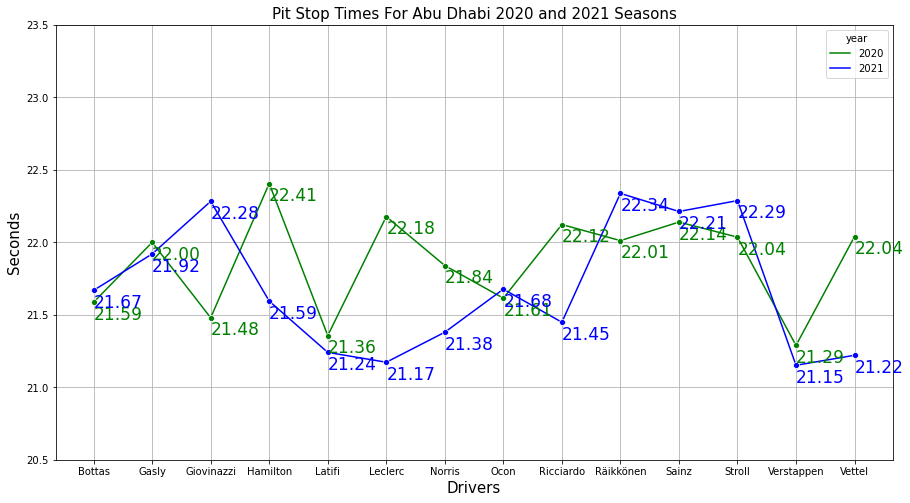

In [234]:

plt.figure(figsize=(15,8))

palette  =['g','b']

ax1= sns.lineplot(pit_times['surname'],pit_times['milliseconds'], hue= pit_times['year'],palette=palette, marker='o')

plt.title('Pit Stop Times For Abu Dhabi 2020 and 2021 Seasons', fontsize=15)
plt.xlabel('Drivers', fontsize=15)
plt.ylabel('Seconds', fontsize=15)
plt.ylim(20.5,23.5)

for item, color in zip(pit_times.groupby('year'),palette):
    for x,y,m in item[1][['surname','milliseconds','milliseconds']].values:
        ax1.text(x,y-.1201,f'{m:.2f}',color=color,fontsize=17)


plt.grid(True)
plt.show()